# Adiabatic CZ Gate

In [73]:
from pulser import Pulse, Sequence, Register
from pulser.waveforms import GaussianWaveform, ConstantWaveform

import matplotlib.pyplot as plt

In [403]:
duration = 2000
gauss = GaussianWaveform(duration,2.5/1000,402)

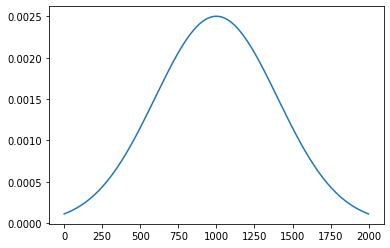

In [404]:
plt.plot(gauss.samples)

In [405]:
gauss.integral

0.00248675952562135

In [406]:
twopi = Pulse(gauss,ConstantWaveform(duration,.1e-3),0)

In [407]:
from pulser.devices import Chadoq2
from pulser.simulation import Simulation

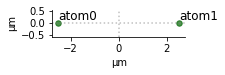

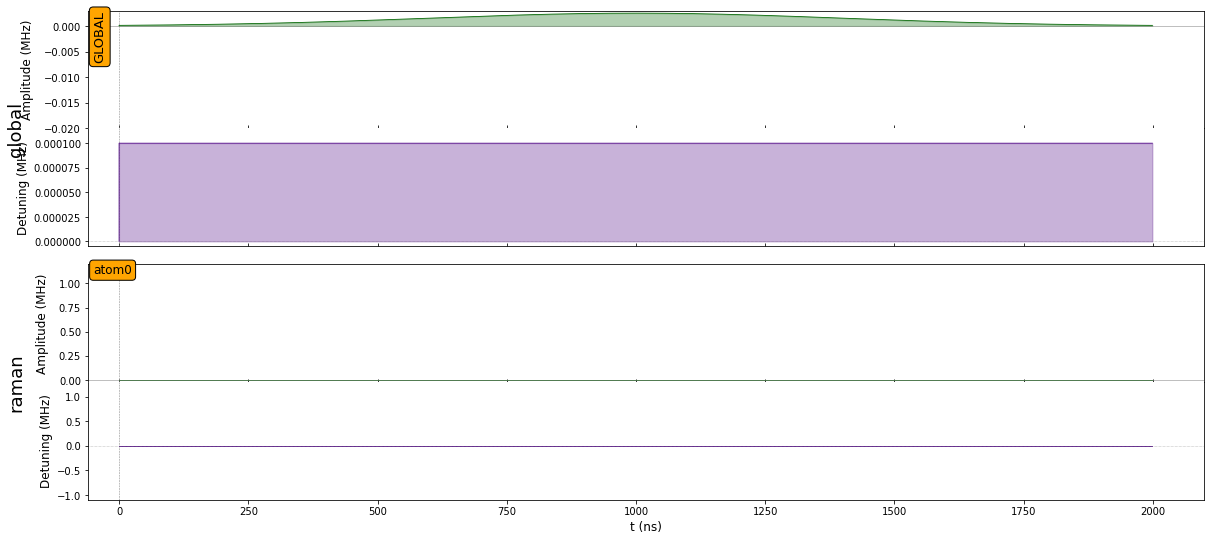

In [408]:
R = 5

# Atom Register and Device
L = 2
reg = Register.rectangle(1, L, spacing=R, prefix='atom')
device = Chadoq2(reg) 
reg.draw()

# Define sequence and Set channels
seq = Sequence(device)
seq.declare_channel('global', 'rydberg_global') #Atom 1 will be target
seq.declare_channel('raman', 'raman_local', initial_target='atom0') # Idle so that 3-state basis is used

seq.add(twopi, 'global') 

seq.draw()

In [409]:
import qutip
import numpy as np

simul = Simulation(seq)

In [410]:
states = {
    'gg' : qutip.tensor([qutip.basis(3,1),qutip.basis(3,1)]),
    'hg' : qutip.tensor([qutip.basis(3,1),qutip.basis(3,2)]),
    'gh' : qutip.tensor([qutip.basis(3,2),qutip.basis(3,1)]),
    'hh' : qutip.tensor([qutip.basis(3,2),qutip.basis(3,2)])
}

(-0.929398546454859-0.04344905086590508j)
(-0.7910004008559969-0.06380740125590043j)
(-0.7910004008559969-0.06380740125590043j)
(1+0j)


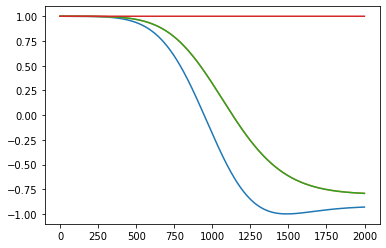

In [411]:
for x in states:
    data= []
    simul.run(initial_state = states[x], all_states=True)

    for state in simul.output:
        res = state.overlap(states[x])
        data.append(res)
    
    print(data[-1])
    data = np.real(data)
    plt.plot(data)

In [414]:
2e6

2000000.0